In [1]:
from utils import mnist_reader

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

seed = 1234
np.random.seed(seed)

In [2]:
#Documentation located at: https://github.com/zalandoresearch/fashion-mnist
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [3]:
SuperXArr = np.concatenate((X_train, X_test), axis=0)
SuperYArr = np.concatenate((y_train, y_test))

In [4]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

print(SuperXArr.shape)

print(set(y_train))

(60000, 784)
(60000,)
(10000, 784)
(10000,)
(70000, 784)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


aindes 0
0 0
aindes 1
0 1
aindes 2
0 2
aindes 3
0 3
aindes 4
0 4
aindes 5
1 0
aindes 6
1 1
aindes 7
1 2
aindes 8
1 3
aindes 9
1 4


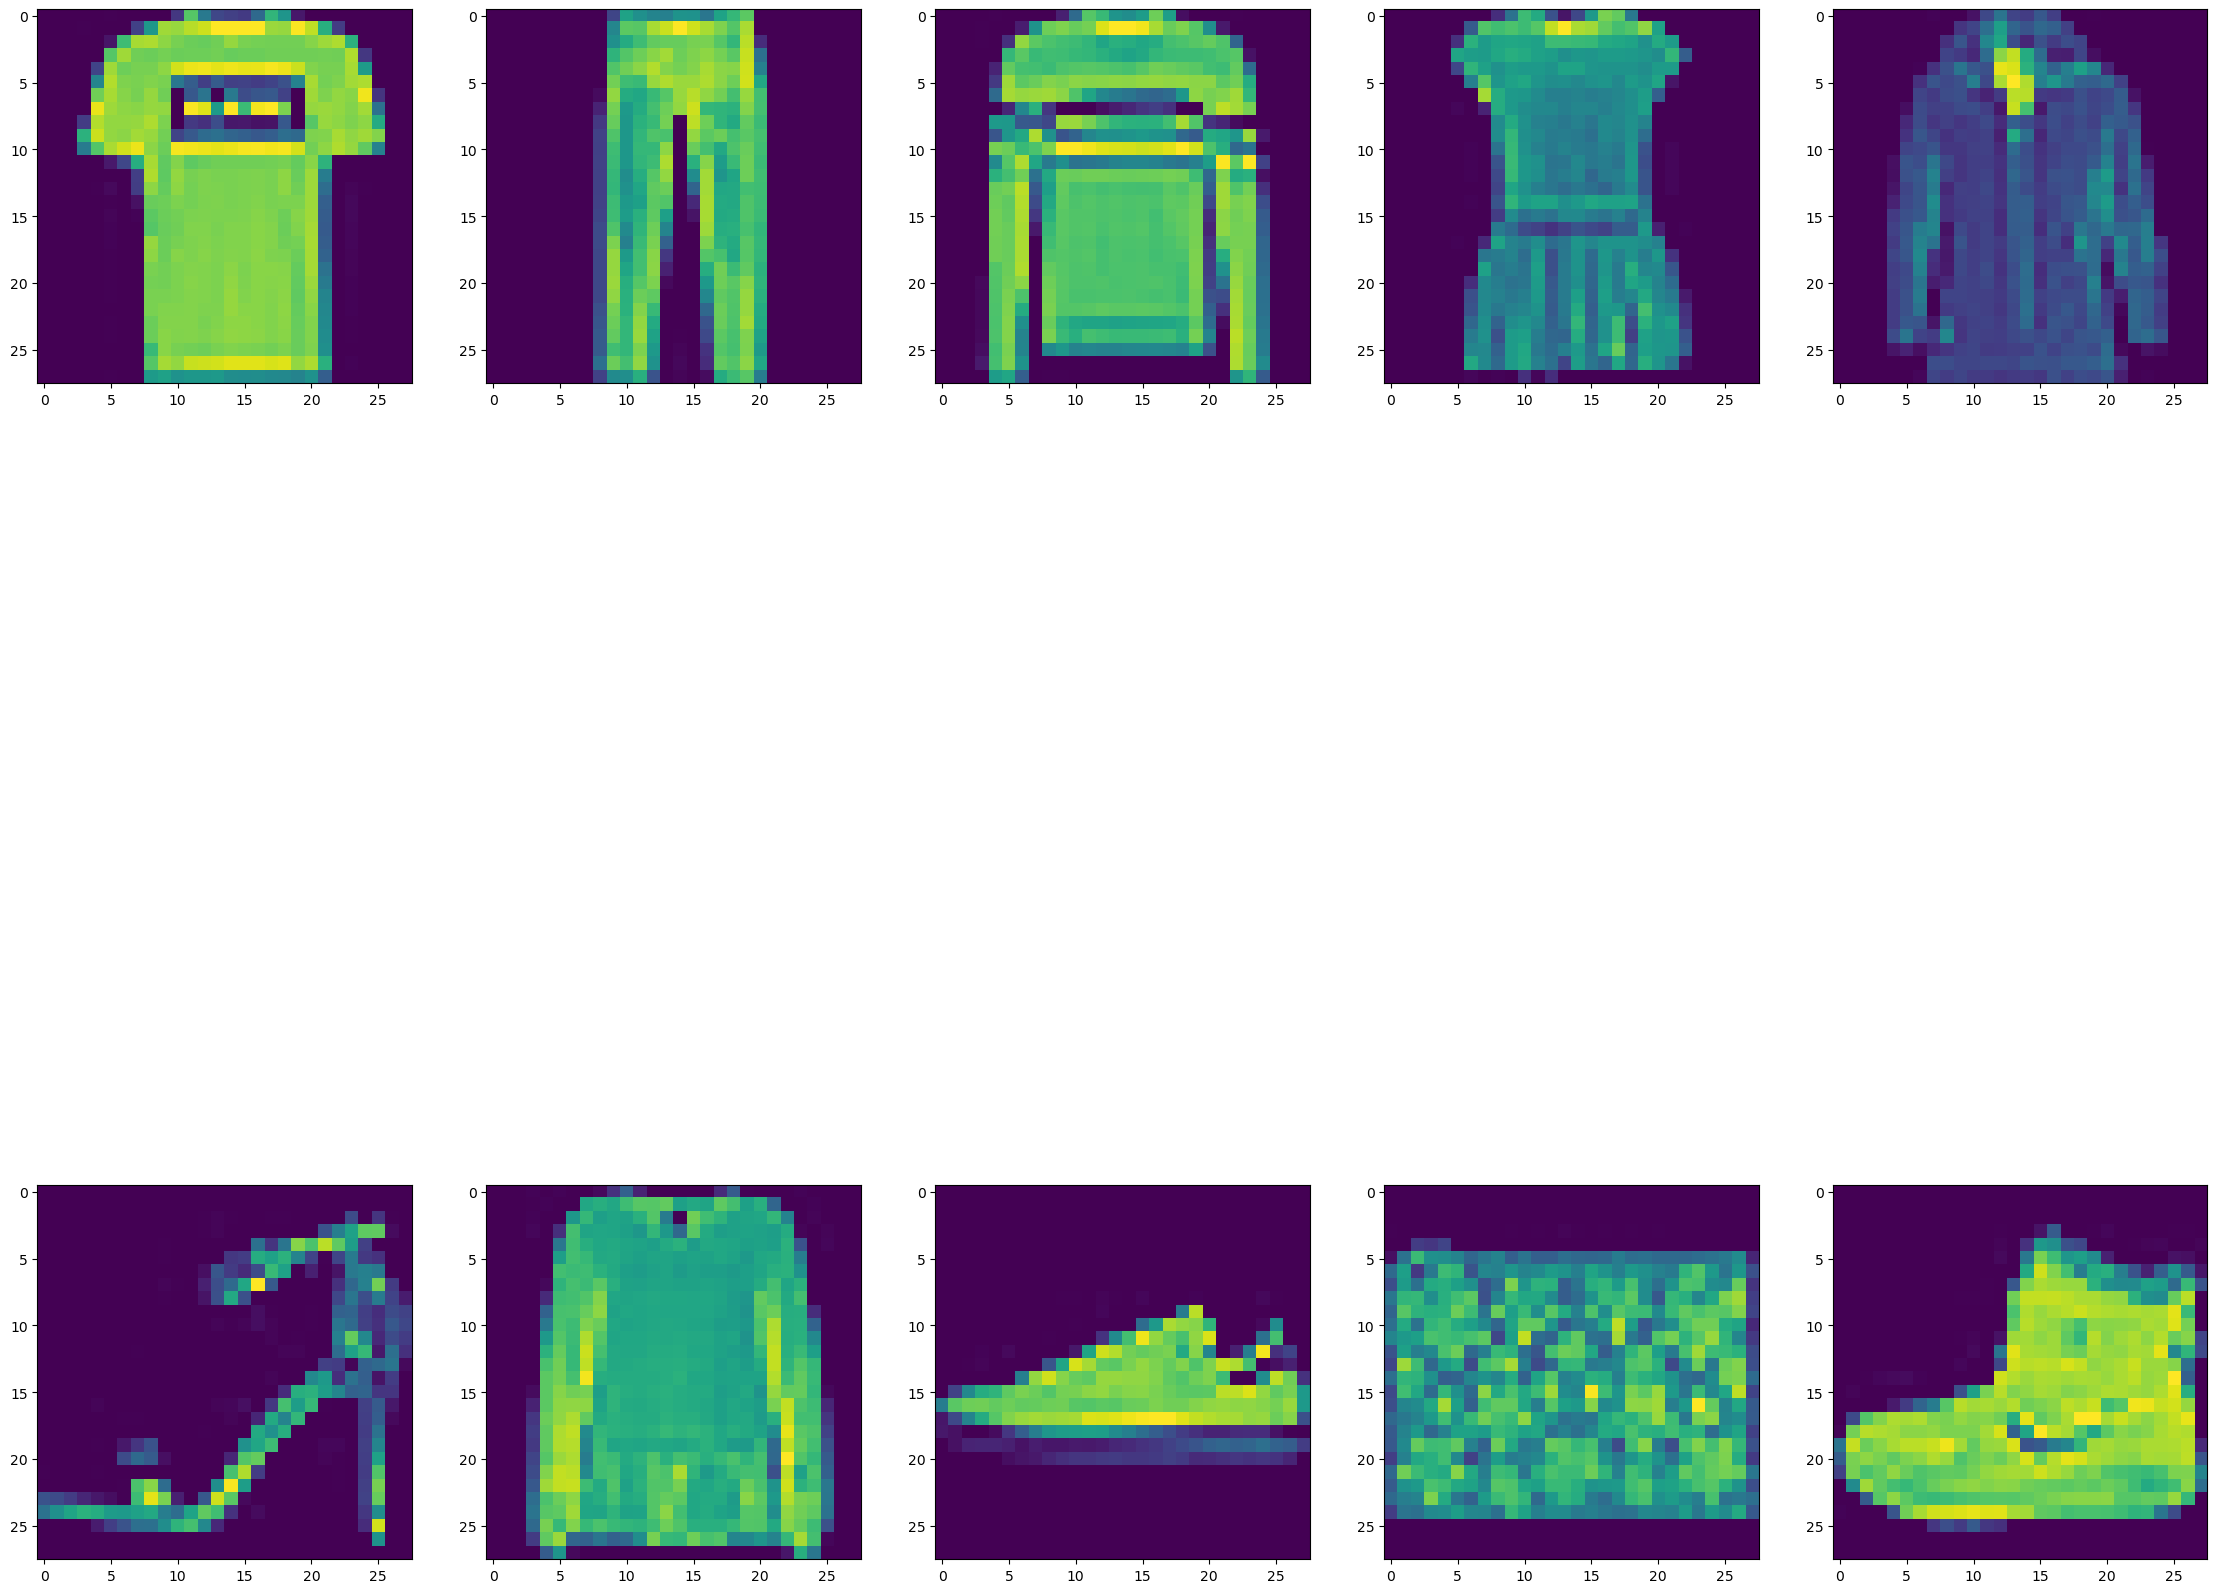

In [5]:
figure, axes = plt.subplots(2, 5, figsize=(28, 28))

counter = 0

for ax in range(2):
    for ay in range(5):
        aYval = counter
        print(f"aindes {aYval}")
        print(f"{ax} {ay}")
        # print(X_train[y_train == aind,:][0,:])
    
        axes[ax][ay].imshow(X_train[y_train == aYval,:][0,:].reshape((28,28)))

        counter += 1

In [6]:
df_describe = pd.DataFrame(SuperXArr)
df_describe.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.00000,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.00000,70000.000000,70000.000000
mean,0.000771,0.006414,0.034486,0.098886,0.247843,0.408714,0.802900,2.204386,5.634900,14.41000,...,34.582314,23.288643,16.611600,17.823371,22.887986,17.968129,8.524043,2.75140,0.836529,0.072914
std,0.087339,0.296605,1.200882,2.458872,4.408110,5.842288,8.186472,14.117208,23.698865,38.18827,...,57.584612,48.935288,42.075046,43.901606,51.853192,45.231601,29.527900,17.38577,9.258426,2.129924
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,57.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,16.000000,45.000000,218.000000,185.000000,227.000000,230.000000,224.000000,225.000000,254.000000,255.00000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,170.000000


In [ ]:
#test train a nn using MLP

TheFirstMLPModel = MLPClassifier(
    hidden_layer_sizes=(512), activation='relu',
        #does this disable l2 regularization ?
        alpha = 0.001,
        #optimization procedure
        solver='adam', learning_rate='constant', learning_rate_init=0.001,

    #set random seed
    random_state=seed
    
)

TheFirstMLPModel.fit(X_train,y_train)




In [ ]:
FirstModAccTrain = accuracy_score(TheFirstMLPModel.predict(X_train),y_train)
FirstModAccValid = accuracy_score(TheFirstMLPModel.predict(X_test),y_test)
print(f"First Model Accuracy Train ACC: {FirstModAccTrain} Validation ACC: {FirstModAccValid}")

# Evaluate confusion matrix using the sklearn function confusion_matrix
sklearn_cm = confusion_matrix(y_test, TheFirstMLPModel.predict(X_test))
sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)
sklearn_disp.plot();

In [ ]:
%%capture HUoutput
HiddenUnitSzList = [32,64,128,256,512,1024,2048]

TheMLPModelList = list()

for aHiddenUnitsz in HiddenUnitSzList:
    print(aHiddenUnitsz)
    
    tempMLPModel = MLPClassifier(
        hidden_layer_sizes=(aHiddenUnitsz), activation='relu',
            #does this disable l2 regularization ?
            alpha = 0.001,
            #optimization procedure
            solver='adam', learning_rate='constant', learning_rate_init=0.001,
    
        #set random seed
        random_state=seed
        
    )

    tempMLPModel.fit(X_train,y_train)

    TheMLPModelList.append(tempMLPModel)

print("Done training")

    

In [ ]:
HUoutput.show()

In [ ]:
#printing out the results

for ind,amodel in enumerate(TheMLPModelList):
    print(f"The HU Size: {HiddenUnitSzList[ind]}")

    tempModTrainAcc = accuracy_score(amodel.predict(X_train),y_train)
    tempModTestAcc = accuracy_score(amodel.predict(X_test),y_test)

    print(f"The Train ACC: {tempModTrainAcc} Test ACC: {tempModTestAcc}")